📥 Step 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout 
from tensorflow.keras.optimizers import Adam 

📥 Step 2: Download Apple Stock Data (Last 6 Years)

In [3]:
df = yf.download("AAPL", period="6y", auto_adjust=True)

df = df[['Close']] 
df.dropna(inplace=True)

print(df.head())
print(df.shape)

[*********************100%***********************]  1 of 1 completed

Price           Close
Ticker           AAPL
Date                 
2019-12-24  68.588486
2019-12-26  69.949303
2019-12-27  69.922768
2019-12-30  70.337776
2019-12-31  70.851700
(1509, 1)


🧹 Step 3: Data Scaling

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

⏳ Step 4: Create Lag Features (Past 15 Days)

In [5]:
def create_dataset(data, time_step=15):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, 15)

X = X.reshape(X.shape[0], X.shape[1], 1)


🔀 Step 5: Train-Test Split

In [6]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

🧠 Step 6: Build Deep LSTM Model

In [7]:
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(15, 1)))
model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

model.summary()

f:\he he he\Jupyter_Notebook\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 15, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

🚀 Step 7: Train Model

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 0.0315 - val_loss: 0.0051
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 9/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 10/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 11/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 12/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.

📈 Step 8: Model Prediction

In [9]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


📏 Step 9: RMSE Calculation

In [10]:
rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
print("RMSE:", round(rmse, 2))

RMSE: 8.87


📉 Step 10: Visualization

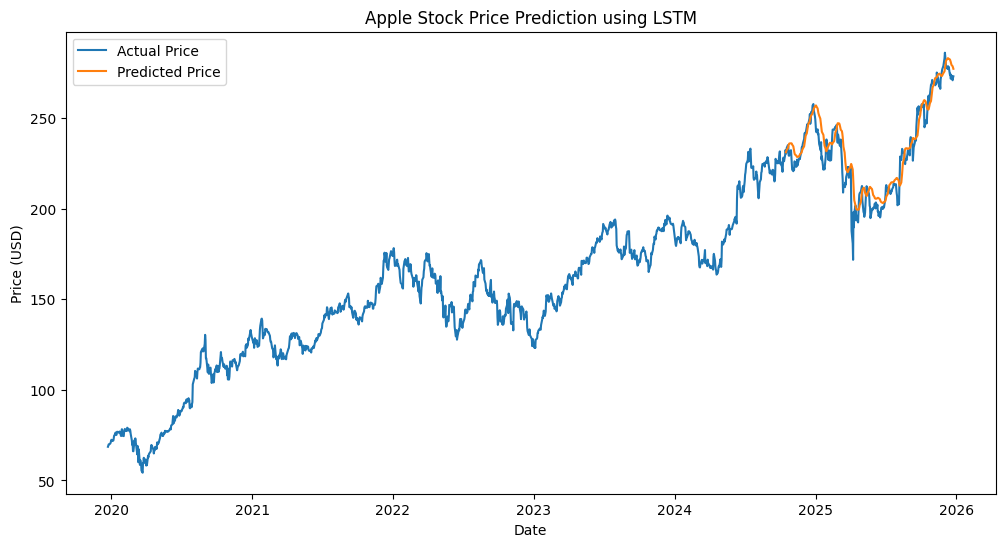

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Actual Price')

test_index = df.index[split+15:]
plt.plot(test_index, test_predict, label='Predicted Price')

plt.title("Apple Stock Price Prediction using LSTM")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()